# Chicago Bird Diversity

### Instructions
- **Do not run the Section 2 because the initial dataset might not be available at your end.Refrain from running even if it's available as it takes a lot of time**.
- Start running from Section 3. Before that, download the dataset from google drive [link](https://drive.google.com/file/d/1hmlXERz6M9B25s_ogpSJU86cXNG-jW2v/view?usp=sharing) and save it in the **data** folder.

## Section 1. Project Introduction
This project explores the relationship between socio-economic indicators and bird diversity in Chicago communities. Utilizing a dataset containing metrics such as housing conditions, poverty rates, and per capita income alongside bird diversity measures, we aim to investigate whether affluent neighborhoods exhibit higher bird diversity.

## Section 2. Data Cleaning

In [105]:
import eda, ml, pandas as pd, numpy as np, geopandas as gpd, warnings, textwrap; warnings.filterwarnings("ignore")

### 2.1 Read and Filter eBird Dataset

In [ ]:
# Filter colum
# dataset_files = ['xaa','xab','xac','xad','xae','xaf','xag','xah','xai','xaj','xak','xal','xam','xan','xao','xap','xaq','xar','xas','xat','xau','xav','xaw','xax','xay','xaz','xba','xbb','xbc']
# cook_county_df = pd.DataFrame()
# for file in dataset_files:
#     df = pd.read_csv('data/{file}'.format(file=file),sep='\t')
#     df = df[df["COUNTY"].str.lower() == "cook"]
#     cook_county_df = pd.concat([cook_county_df,df])
# cook_county_df.to_csv('data/ebd_cook_county.tsv', index=False,sep='\t')
cook_county_df = pd.read_csv('data/ebd_cook_county.tsv',sep='\t')

In [24]:
df = cook_county_df
req_cols = ['CATEGORY', 'COMMON NAME', 'SCIENTIFIC NAME', 'OBSERVATION COUNT', 'EXOTIC CODE', 'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE', 'PROTOCOL TYPE', 'ALL SPECIES REPORTED']
df = df[req_cols]

We will keep only species level observations (removing subspecies and genus level observations). We will also filter out incomplete checklists and incidental observations to manage bias towards specific species.

In [25]:
df = df[(df['CATEGORY']=='species') & (df['PROTOCOL TYPE']=='Traveling') | (df['PROTOCOL TYPE']=='Stationary') & (df['ALL SPECIES REPORTED']==1)]

### 2.2 ebird Dataset Transformation

In [26]:
df['NATIVE'] = df['EXOTIC CODE'].apply(lambda row:0 if row == np.nan else 1) # Native column: 1 = is native to chicago, 0 = not native to chicago
df['COUNT'] = df['OBSERVATION COUNT'].apply(lambda row: 1 if row == 'X' else row) # Assume all 'X' observations have a count of 1 bird
req_cols = ['COMMON NAME', 'SCIENTIFIC NAME', 'NATIVE', 'COUNT', 'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE']
df = df[req_cols] # remove unnecessary columns

### 2.3 Aggregate eBird data based on neighborhood

In [27]:
com_areas = gpd.read_file('data/neighborhoods/geo_export_f5325bf0-9c6d-49a5-a5d9-0e5bf24fa856.shp')
ebird_gdf = eda.join_datasets(df,com_areas)

### 2.4 Transform and Save the final dataset

In [28]:
ebird_gdf = eda.modify_ebird_dataset(ebird_gdf)
ebird_gdf.to_csv("data/final_dataset.tsv",index=False,sep='\t')

## Section 3: EDA

- **Final Dataset**
    - The granularity of the final dataset is eBird data of Chicago starting from the year 1948 to 2024.

In [12]:
ebird_gdf = pd.read_csv('data/final_dataset.tsv',sep='\t')

In [17]:
ebird_gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902730 entries, 0 to 3902729
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   COMMON NAME        object
 1   SCIENTIFIC NAME    object
 2   NATIVE             int64 
 3   COUNT              int64 
 4   OBSERVATION DATE   object
 5   geometry           object
 6   community          object
 7   OBSERVATION MONTH  int64 
 8   OBSERVATION DAY    int64 
 9   OBSERVATION YEAR   int64 
dtypes: int64(5), object(5)
memory usage: 297.8+ MB


In [15]:
ebird_gdf.head(5)

,COMMON NAME,SCIENTIFIC NAME,NATIVE,COUNT,OBSERVATION DATE,geometry,community,OBSERVATION MONTH,OBSERVATION DAY,OBSERVATION YEAR
0,American Crow,Corvus brachyrhynchos,1,1,1948-05-16,POINT (-87.5813341 41.781201),WOODLAWN,5,16,1948
1,American Goldfinch,Spinus tristis,1,4,1948-05-16,POINT (-87.5813341 41.781201),WOODLAWN,5,16,1948
2,American Redstart,Setophaga ruticilla,1,3,1948-05-16,POINT (-87.5813341 41.781201),WOODLAWN,5,16,1948
3,American Robin,Turdus migratorius,1,1,1948-05-16,POINT (-87.5813341 41.781201),WOODLAWN,5,16,1948
4,Black-and-white Warbler,Mniotilta varia,1,5,1948-05-16,POINT (-87.5813341 41.781201),WOODLAWN,5,16,1948


In [47]:
from importlib import reload
reload(eda)

<module 'eda' from '/Users/lokeshmanideep/Desktop/Masters/SpringSemester2024/CS418/LuxuryEffectProject/group-project-the-data-sleuths/eda.py'>

In [25]:
ebird_gdf = ebird_gdf[(ebird_gdf["OBSERVATION YEAR"] >= 2014) & (ebird_gdf["OBSERVATION YEAR"] <= 2023)]

In [30]:
#for col in ["COMMON NAME","community","OBSERVATION YEAR","OBSERVATION MONTH"]:
col = "OBSERVATION MONTH"
distribution = eda.distribution(ebird_gdf,col)

OBSERVATION MONTH distribution

    OBSERVATION MONTH     Size    Percent
4                   5  1031049  31.283753
3                   4   458077  13.898823
8                   9   333924  10.131813
9                  10   281149   8.530531
7                   8   201139   6.102894
5                   6   200810   6.092912
2                   3   192285   5.834249
6                   7   157126   4.767466
10                 11   144656   4.389105
0                   1   102838   3.120277
11                 12    99956   3.032832
1                   2    92788   2.815343





### 3.1 Insights from Datasets

- **Ring-billed Gull** and **European Starling** are the most commonly seen birds in Chicago .
- Approximately **60%** of bird observations are concentrated in only **five** communities, with **uptown** accounting for nearly 27% of these observations.
- **April** and **May** have higher bird observations due to breeding and migration patterns in the summer.

### 3.2 Monthly distribution of bird observations between 2014 and 2023

In [34]:
import matplotlib.pyplot as plt, matplotlib.patches as mpatches, seaborn as sns, plotly.express as px, altair as alt

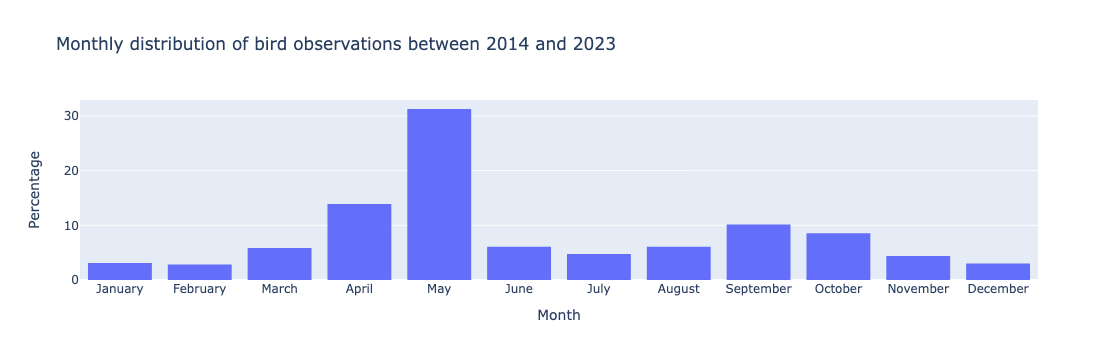

In [41]:
viz_df = distribution
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
viz_df['Month'] = viz_df['OBSERVATION MONTH'].map(month_map)
px.bar(viz_df.sort_values(by="OBSERVATION MONTH"), x="Month", y="Percent", 
       title="Monthly distribution of bird observations between 2014 and 2023", labels={"Percent": "Percentage"}, hover_data={"Month": True}, color_discrete_sequence=["#636EFA"]).update_layout(xaxis_tickangle=0, 
       xaxis=dict(type='category')).update_traces(marker_line_width=0).show()

## Section 4: Vizualizations


## 4.1 (_Did the bird diversity in Chicago increase over the last 10 years?_)

(_The graph depicts bird diversity across Chicago's communities, revealing a correlation between higher per capita income and increased bird diversity, while also highlighting the fluctuating levels of diversity within low-income neighborhoods._)

In [54]:
viz_df = eda.aggregate_data(ebird_gdf,["OBSERVATION YEAR"])
viz_df["shannon_index"] = viz_df["COUNT"].apply(eda.shannon_index)

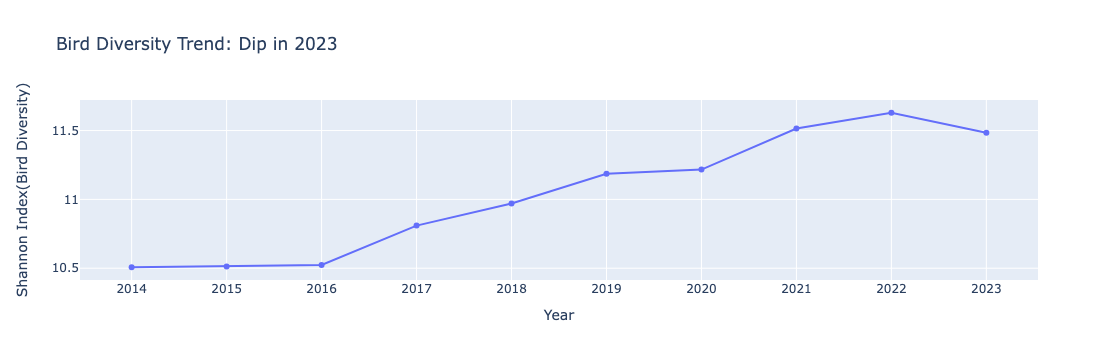

In [63]:
#viz_df = viz_df[(viz_df["OBSERVATION YEAR"] >= 2019) & (viz_df["OBSERVATION YEAR"] <= 2023)] 
fig = px.line(viz_df.sort_values(by="OBSERVATION YEAR"), x='OBSERVATION YEAR', y='shannon_index',
             title='Bird Diversity Trend: Dip in 2023',
             labels={'OBSERVATION YEAR': 'Year', 'shannon_index': 'Shannon Index(Bird Diversity)'},markers=True)
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))
fig.show()


## 4.2 (_Which communities have higher bird diversity?_)

(_The graph depicts bird diversity across Chicago's communities_)

In [75]:
# Plotting
com_areas = gpd.read_file('data/neighborhoods/geo_export_f5325bf0-9c6d-49a5-a5d9-0e5bf24fa856.shp')
df_2023 = ebird_gdf[ebird_gdf["OBSERVATION YEAR"] == 2023]
viz_df = eda.aggregate_data(df_2023,["community"])
viz_df["shannon_index"] = viz_df["COUNT"].apply(eda.shannon_index)
viz_df = viz_df[["community","shannon_index"]]
gdf = com_areas.merge(viz_df, on='community')
gdf

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry,shannon_index
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",5.361098
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",4.967598
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",1.139535
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816...",2.854021
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",3.965779
...,...,...,...,...,...,...,...,...,...,...,...
70,0.0,74,74,0.0,0.0,MOUNT GREENWOOD,0.0,7.558429e+07,48665.130539,"POLYGON ((-87.69646 41.70714, -87.69644 41.706...",2.628951
71,0.0,75,75,0.0,0.0,MORGAN PARK,0.0,9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685...",5.043987
72,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.984660,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...",6.451066
73,0.0,77,77,0.0,0.0,EDGEWATER,0.0,4.844999e+07,31004.830946,"POLYGON ((-87.65456 41.99817, -87.65456 41.998...",6.652118


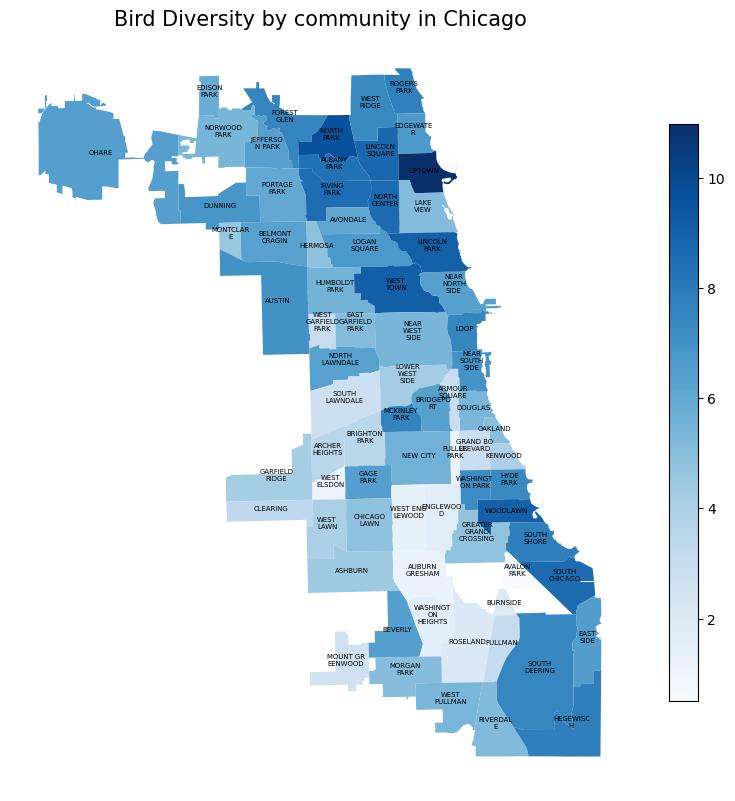

In [104]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='shannon_index', cmap='Blues', linewidth=0.8, ax=ax,legend=True,legend_kwds={'shrink': 0.75})
for idx, row in gdf.iterrows():
    wrapped_text = textwrap.fill(row['community'], width=8)
    plt.annotate(text=wrapped_text, xy=row.geometry.centroid.coords[0], ha='center', fontsize=5)
ax.set_title('Bird Diversity by community in Chicago', fontdict={'fontsize': '15', 'fontweight' : '3'})
# Remove axis
ax.set_axis_off()
plt.show()

## Section 5: Machine Learning Analysis

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
features = ['PERCENT OF HOUSING CROWDED', 
            'PERCENT HOUSEHOLDS BELOW POVERTY', 
            'HARDSHIP INDEX',
            'PER CAPITA INCOME']
target = 'shannon_index'
X = final_df[features]
y = final_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.1 Baseline

- The baseline model uses mean of the target data for fitting the data

In [41]:
print("Mean Squared Error (Baseline - Mean Prediction): {}".format(ml.baseline(y_train,y_test)))

Mean Squared Error (Baseline - Mean Prediction): 6.226041012212022


### 5.2 Decision Tree Regressor vs Baseline
- Decision Tree Regressor's MSE of 13.741 indicates substantial prediction errors.Baseline MSE of 6.226 shows the model's performance is worse than a simple mean predictor.Possible overfitting is suggested by the high MSE of the baseline model, might need for model refinement.

In [56]:
print("Mean Squared Error (Decision Trees): {}".format(ml.decisiontree(X_train, y_train,X_test,y_test)))

Mean Squared Error (Decision Trees): 13.741316951941537


### 5.3 Random forest regressor vs baseline
- Random Forest leverages ensemble learning, combining multiple decision trees for improved accuracy.It captures non-linear relationships in data, unlike the Baseline, which predicts a constant mean.Random Forest automatically assesses feature importance, focusing on relevant predictors, reducing prediction errors.

In [57]:
print("Mean Squared Error (Random Forest): {}".format(ml.randomforest(X_train, y_train,X_test,y_test)))

Mean Squared Error (Random Forest): 4.330921826772657


## Section 6: Reflection
### What is hardest part of the project that you’ve encountered so far?
 Identifying community of a bird observation using the bird coordinates and the community boundaries.Obtaining the correct geographical dataset of Illinois counties with exact coordinates.  
 
### What are your initial insights?
 Rich communities definitely have the higher bird diversity but the vice versa is not exactly true.